In [2]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
#2
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

# Extract revenue table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])
tesla_revenue.tail()


,Date,Revenue


In [8]:
#4
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all("table")
for table in tables:
    for row in table.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "":
                gme_revenue = pd.concat(
                    [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])]
                )
print(gme_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


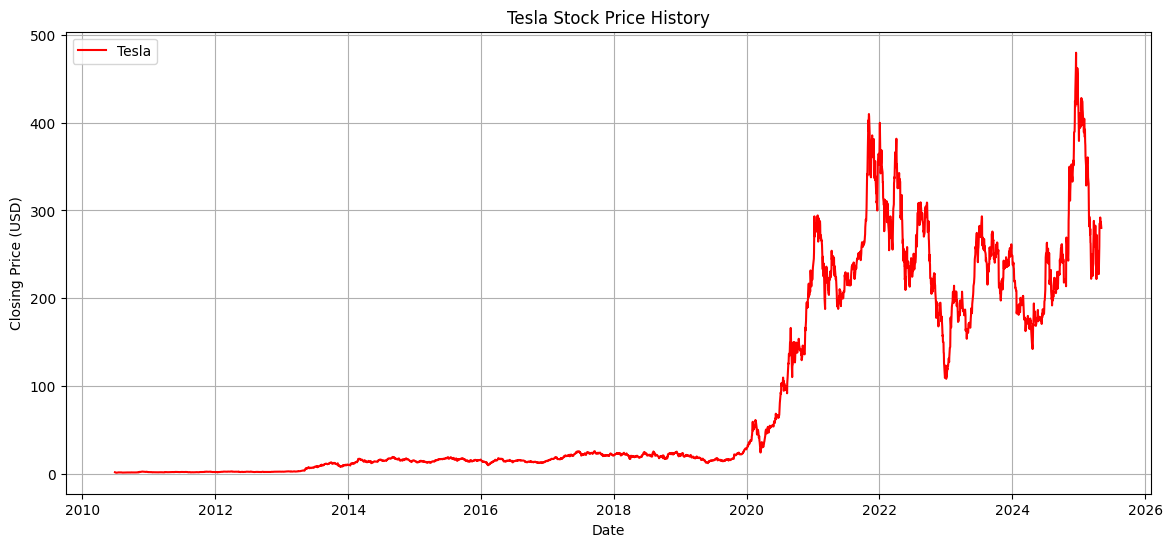

In [10]:
import matplotlib.pyplot as plt
def make_graph(stock_data, stock, title):
    plt.figure(figsize=(14,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock, color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()
make_graph(tesla_data, 'Tesla', 'Tesla Stock Price History')

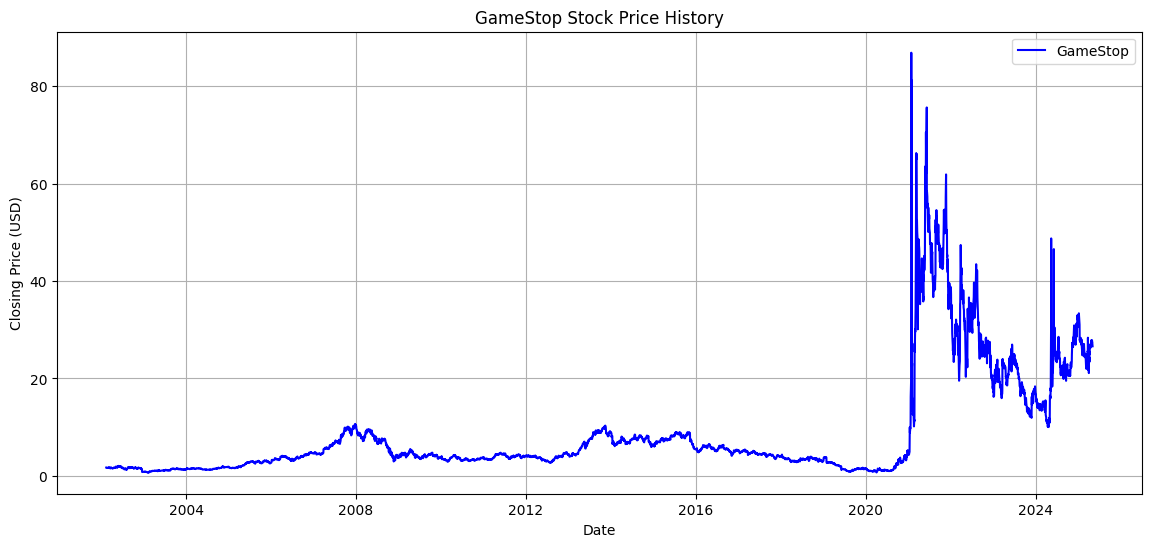

In [16]:
#6
def make_graph(stock_data, stock, title):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(14,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock, color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()
make_graph(gme_data, 'GameStop', 'GameStop Stock Price History')


In [14]:
import yfinance as yf

# Download GME stock data using yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index so 'Date' becomes a column
gme_data.reset_index(inplace=True)

# Optional: Preview first few rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
